In [ ]:
Workflow:
- Lectrura de datos
- Plot y seleccion
- Split de datos (train y test)
- Escalar datos (escalador basado en trainset)
- Split datos (sliding window)
- Modelar
- Predecir
- Metricas

In [ ]:
# lectura de datos
import pandas as pd

In [ ]:
df = pd.read_csv("sym_h_reduced.csv")

In [ ]:
print(df)

       Unnamed: 0            timestamp        DATE          TIME  DOY  ASY-D  \
0         3201120  2013-02-01 00:00:00  2013-02-01  00:00:00.000   32   15.0   
1         3201121  2013-02-01 00:01:00  2013-02-01  00:01:00.000   32   14.0   
2         3201122  2013-02-01 00:02:00  2013-02-01  00:02:00.000   32   13.0   
3         3201123  2013-02-01 00:03:00  2013-02-01  00:03:00.000   32   13.0   
4         3201124  2013-02-01 00:04:00  2013-02-01  00:04:00.000   32   13.0   
...           ...                  ...         ...           ...  ...    ...   
40315     3241435  2013-02-28 23:55:00  2013-02-28  23:55:00.000   59   24.0   
40316     3241436  2013-02-28 23:56:00  2013-02-28  23:56:00.000   59   24.0   
40317     3241437  2013-02-28 23:57:00  2013-02-28  23:57:00.000   59   23.0   
40318     3241438  2013-02-28 23:58:00  2013-02-28  23:58:00.000   59   21.0   
40319     3241439  2013-02-28 23:59:00  2013-02-28  23:59:00.000   59   21.0   

       ASY-H  SYM-D  SYM-H  
0       34

In [ ]:
# seleccionaar solo sym-h
data = df["SYM-H"]
print(data.shape)

(40320,)


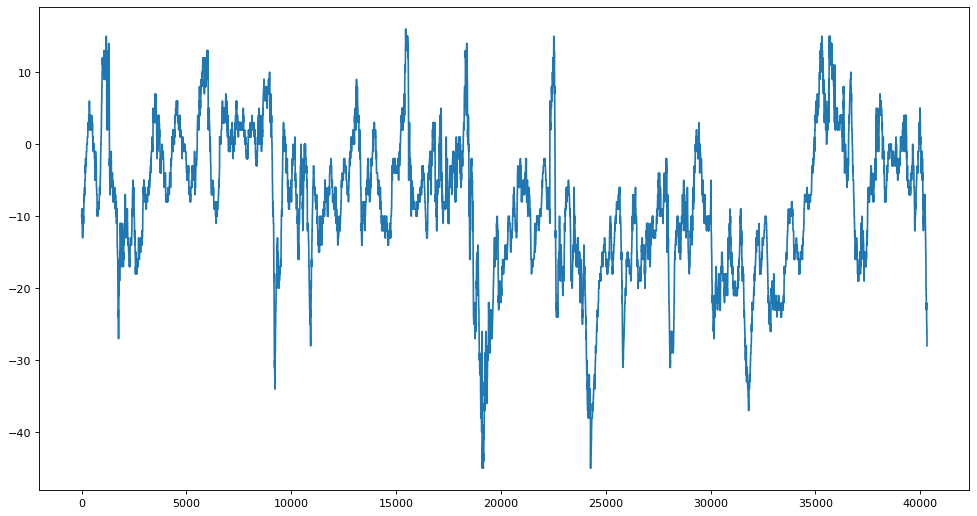

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8), dpi=80)
plt.plot(data)

In [ ]:
ddI = "01"
mmI = "02"
yyI = "2013"
yymmddI = str(yyI) + "-" + str(mmI) + "-"  + str(ddI)

ddE = "10"
mmE = "02"
yyE = "2013"
yymmddE = str(yyE) + "-" + str(mmE) + "-" + str(ddE)

dataReduced = df.loc[(df.timestamp >= yymmddI) & (df.timestamp <= yymmddE)]

In [ ]:
print(dataReduced.shape)

(12960, 9)


In [ ]:
# split de datos en train y test
from sklearn.model_selection import train_test_split

In [ ]:
dataSet = dataReduced["SYM-H"]
print(dataSet.shape)

(12960,)


In [ ]:
data_train, data_test = train_test_split(dataSet, test_size=0.2, shuffle=False)
print(data_train.shape)
print(data_test.shape)

(10368,)
(2592,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
data_train = data_train.to_numpy()
data_train = data_train.reshape((-1,1))
data_train_scaled = scaler.fit_transform(data_train)

In [ ]:
print(data_train_scaled)

[[0.48979592]
 [0.48979592]
 [0.48979592]
 ...
 [0.3877551 ]
 [0.3877551 ]
 [0.40816327]]


In [ ]:
data_test = data_test.to_numpy()
data_test = data_test.reshape((-1,1))
data_test_scaled = scaler.transform(data_test)

In [ ]:
print(data_test_scaled)

[[0.42857143]
 [0.44897959]
 [0.46938776]
 ...
 [0.69387755]
 [0.69387755]
 [0.69387755]]


In [ ]:
# definir la funcion sliding window
from numpy import array
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if(out_end_ix > len(sequence)):
      break
    seq_x, seq_y = sequence[i:end_ix] , sequence[end_ix:out_end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X),array(y)

In [ ]:
n_steps_in = 5
n_steps_out = 3

X, y = split_sequence(data_train_scaled, n_steps_in, n_steps_out)

In [ ]:
print(X)

[[[0.48979592]
  [0.48979592]
  [0.48979592]
  [0.48979592]
  [0.48979592]]

 [[0.48979592]
  [0.48979592]
  [0.48979592]
  [0.48979592]
  [0.48979592]]

 [[0.48979592]
  [0.48979592]
  [0.48979592]
  [0.48979592]
  [0.48979592]]

 ...

 [[0.36734694]
  [0.36734694]
  [0.36734694]
  [0.3877551 ]
  [0.3877551 ]]

 [[0.36734694]
  [0.36734694]
  [0.3877551 ]
  [0.3877551 ]
  [0.3877551 ]]

 [[0.36734694]
  [0.3877551 ]
  [0.3877551 ]
  [0.3877551 ]
  [0.3877551 ]]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(50,activation="tanh", input_dim=n_steps_in))
model.add(Dense(n_steps_out))

# subir rticulo comparacion optimizers
model.compile(optimizer="adam", loss="mse")
history = model.fit(X,y, epochs=5,validation_split=0.2, verbose=2)

Epoch 1/5
259/259 - 2s - loss: 0.0134 - val_loss: 0.0012 - 2s/epoch - 6ms/step
Epoch 2/5
259/259 - 1s - loss: 6.3045e-04 - val_loss: 5.1131e-04 - 713ms/epoch - 3ms/step
Epoch 3/5
259/259 - 1s - loss: 3.2257e-04 - val_loss: 3.8764e-04 - 659ms/epoch - 3ms/step
Epoch 4/5
259/259 - 1s - loss: 2.6105e-04 - val_loss: 3.9181e-04 - 666ms/epoch - 3ms/step
Epoch 5/5
259/259 - 1s - loss: 2.5056e-04 - val_loss: 3.8913e-04 - 637ms/epoch - 2ms/step


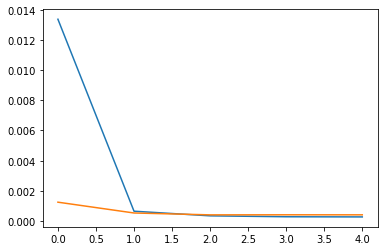

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
# predecir 
y_hat_1 = model.predict(data_train_scaled[-5:].reshape((1,-1)))

In [ ]:
y_hat_1

array([[0.39760122, 0.37642238, 0.38656738]], dtype=float32)

In [ ]:
data_train_scaled[-5:].reshape((1,-1))

array([[0.3877551 , 0.3877551 , 0.3877551 , 0.3877551 , 0.40816327]])

In [ ]:
from sklearn.metrics import mean_squared_error as mse

mse(y_hat_1, data_test_scaled[0:3].reshape((1,-1)))

0.004360972507568033

In [ ]:
print(y_hat_1)
print(data_test_scaled[0:3].reshape((1,-1)))

[[0.39760122 0.37642238 0.38656738]]
[[0.42857143 0.44897959 0.46938776]]


In [ ]:
y_predict = scaler.inverse_transform(y_hat_1)
y_predict

array([[-14.51754 , -15.555304, -15.058198]], dtype=float32)